   ## Importing libraries for extracting data, framing the data in excel/csv format or importing seaborn library to visualize the data. 

In [36]:
import camelot as cm
import seaborn as sns
from matplotlib import pyplot as plt

### Giving path of pdf file

In [2]:
tables_DF = cm.read_pdf("india_factsheet_economic_n_hdi.pdf",flavor='lattice',pages='1,2')

Overwriting cache for 0 71
Overwriting cache for 0 71
Overwriting cache for 0 71


### Giving url of the pdf file

In [3]:
#input_pdf = cm.read_pdf("https://www.undp.org/content/dam/india/docs/india_factsheet_economic_n_hdi.pdf",flavor='stream')

In [4]:
"stream", "lattice"

('stream', 'lattice')

In [5]:
tables_DF

<TableList n=4>

In [6]:
for n in tables_DF:
    print(n)

<Table shape=(4, 3)>
<Table shape=(15, 3)>
<Table shape=(14, 4)>
<Table shape=(13, 3)>


In [7]:
tables_DF[2].df

,0,1,2,3
0,Human Development Indicators,,2000,2011
1,13,Human Development Index Value (HDI),0.461,0.547
2,14,HDI Rank (out of 187),,134
3,15,Inequality Adjusted Human Development Index Value,,0.392
4,16,Loss in HDI due to Inequalities (%),,28.7
5,,,2001,2011
6,17,Gender Inequality Index (GII),0.5531,0.617
7,18,GII Rank (out of 146),,129
8,,,1996,2006
9,19,Gender Empowerment Measure (GEM),0.416,0.497


In [8]:
df = tables_DF[2].df.loc[9:14,1:3]
df

,1,2,3
9,Gender Empowerment Measure (GEM),0.416,0.497
10,,2001,2011
11,Literacy Rate (%),64.8,74.04
12,Male Literacy Rate (%),75.3,82.14
13,Female Literacy Rate (%),53.7,65.46


In [9]:
df = df.reset_index(drop = True)
df

,1,2,3
0,Gender Empowerment Measure (GEM),0.416,0.497
1,,2001,2011
2,Literacy Rate (%),64.8,74.04
3,Male Literacy Rate (%),75.3,82.14
4,Female Literacy Rate (%),53.7,65.46


In [10]:
df.columns = ["KPI","2001","2011"]
df

,KPI,2001,2011
0,Gender Empowerment Measure (GEM),0.416,0.497
1,,2001,2011
2,Literacy Rate (%),64.8,74.04
3,Male Literacy Rate (%),75.3,82.14
4,Female Literacy Rate (%),53.7,65.46


In [11]:
df.loc[:,["2001","2011"]] = df.loc[:,["2001","2011"]].astype(float)


In [12]:
df

,KPI,2001,2011
0,Gender Empowerment Measure (GEM),0.416,0.497
1,,2001.0,2011.0
2,Literacy Rate (%),64.8,74.04
3,Male Literacy Rate (%),75.3,82.14
4,Female Literacy Rate (%),53.7,65.46


### Converting data into comma seperated value(csv) format

In [13]:
df.to_csv("tables_output.csv")
df

,KPI,2001,2011
0,Gender Empowerment Measure (GEM),0.416,0.497
1,,2001.0,2011.0
2,Literacy Rate (%),64.8,74.04
3,Male Literacy Rate (%),75.3,82.14
4,Female Literacy Rate (%),53.7,65.46


In [14]:
ls

 Volume in drive D has no label.
 Volume Serial Number is B830-F5BF

 Directory of D:\Python\Email_Scraping

10/02/2022  08:15 PM    <DIR>          .
10/02/2022  08:15 PM    <DIR>          ..
10/02/2022  05:29 PM    <DIR>          .idea
10/02/2022  04:02 PM    <DIR>          .ipynb_checkpoints
10/02/2022  08:15 PM            62,709 Extracting Table From PDF-UN HDI REPORT.ipynb
10/02/2022  11:48 AM             2,293 HackerNews_Emailer_Scraping.py
10/02/2022  02:35 PM        33,392,650 ILYAS_Automated_Video.mp4
10/02/2022  03:04 PM        33,392,650 ILYAS_Custom_Video.mp4
10/02/2022  04:05 PM           850,276 india_factsheet_economic_n_hdi.pdf
09/30/2022  11:02 PM               656 main.py
10/02/2022  04:05 PM             5,090 table_from_pdf.xlsx
10/02/2022  07:03 PM             5,120 tables_from_pdf.xlsx
10/02/2022  08:16 PM               190 tables_output.csv
10/02/2022  07:27 PM             5,120 tables_output_excel.xlsx
10/02/2022  03:14 PM             2,327 TED_TALK_Downloader.py


In [15]:
import pandas as pd
df1 = pd.read_csv("tables_output.csv")
df1

,Unnamed: 0,KPI,2001,2011
0,0,Gender Empowerment Measure (GEM),0.416,0.497
1,1,NaN,2001.000,2011.000
2,2,Literacy Rate (%),64.800,74.040
3,3,Male Literacy Rate (%),75.300,82.140
4,4,Female Literacy Rate (%),53.700,65.460


## Creating Excel File and Visualizing the data set

In [33]:
df.to_excel("tables_from_pdf.xlsx")

In [31]:
df_melted = df.melt('KPI', var_name='year', value_name='percentage')
df_melted

,KPI,year,percentage
0,Gender Empowerment Measure (GEM),2001,0.416
1,,2001,2001.0
2,Literacy Rate (%),2001,64.8
3,Male Literacy Rate (%),2001,75.3
4,Female Literacy Rate (%),2001,53.7
5,Gender Empowerment Measure (GEM),2011,0.497
6,,2011,2011.0
7,Literacy Rate (%),2011,74.04
8,Male Literacy Rate (%),2011,82.14
9,Female Literacy Rate (%),2011,65.46


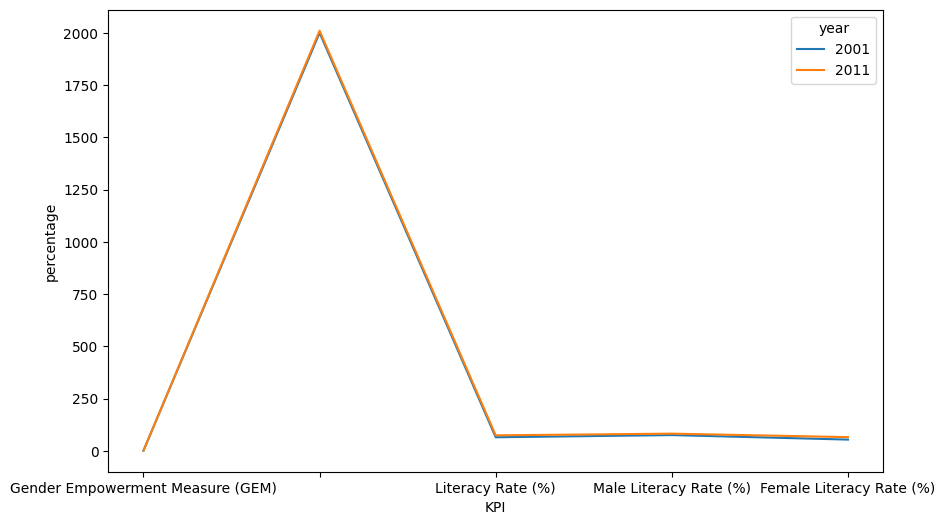

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(x = "KPI", y = "percentage", hue = "year", data = df_melted);